In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mkl

mkl.set_num_threads(4)
np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [5]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples, space_between_tiles=2):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]

    # img_matrix.fill(np.nan)
    # raise Exception("Not implemented!")
    img_height = (tile_height + space_between_tiles) * (rows_count - 1) + tile_height
    img_width = (tile_width + space_between_tiles) * (cols_count - 1) + tile_width
    img_matrix = np.empty(shape=(img_height, img_width))
    for tile_row_idx in range(rows_count):
        for tile_col_idx in range(cols_count):
            start_row_idx = (tile_height + space_between_tiles) * tile_row_idx
            end_row_idx = start_row_idx + tile_height
            start_col_idx = (tile_width + space_between_tiles) * tile_col_idx
            end_col_idx = start_col_idx + tile_width
            img_matrix[start_row_idx:end_row_idx, start_col_idx:end_col_idx] = examples[tile_row_idx][tile_col_idx]

    return img_matrix

## MNIST Dataset

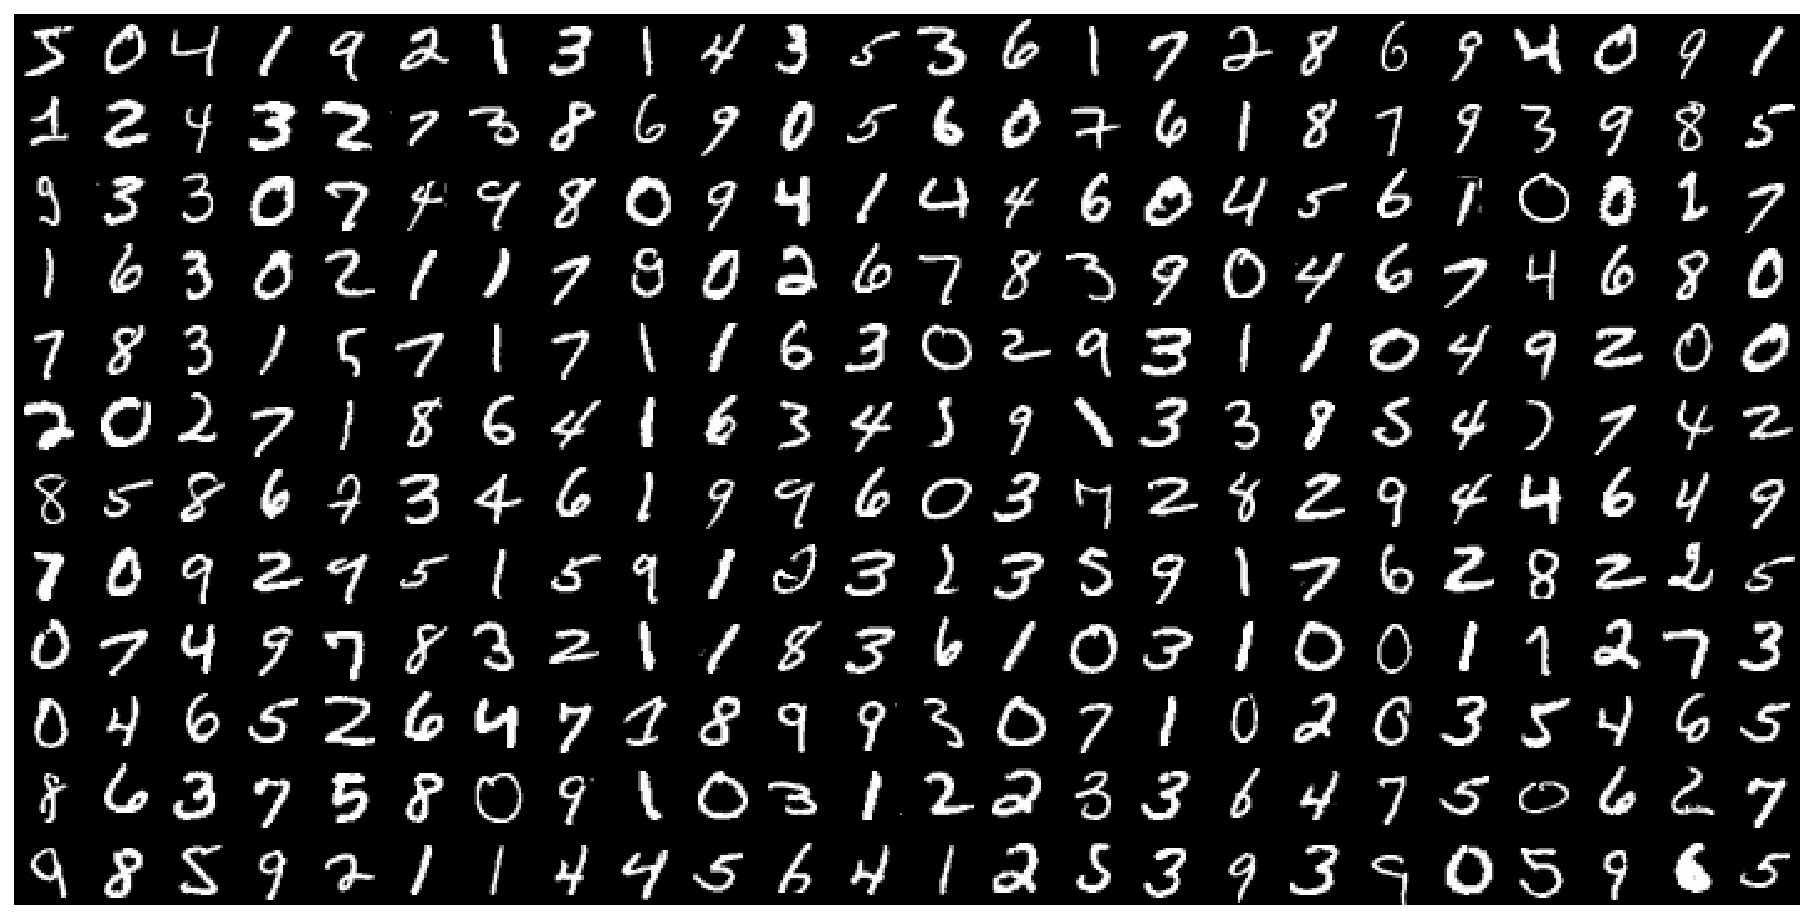

In [6]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [7]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

(60000, 28, 28)

Reshape `X` so that the last two dimensions are collapsed into single dimension.

In [8]:
_, img_height, img_width = X.shape
X = X.reshape(-1, img_height * img_width)

In [9]:
X.shape

(60000, 784)

## Visualizing the distribution of MNIST digits

Add a scatter plot to `plot`, which:
* displys the first two dimensions of `X`,
* includes only these elements from `X` for which `y == i` (i.e. elements from the i-th class),
* includes label (i.e. `i`) in the legend.


In [10]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indices = (y == i)
        dim1 = X[digit_indices][:, 0]
        dim2 = X[digit_indices][:, 1]
        plot.scatter(dim1, dim2)

        # raise Exception("Not implemented!")

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend(labels = [i for i in range(10)])
    plt.show()

### Principal Component Analysis (PCA)

In [11]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

X_small[:10][y[:10] == 1][:, 0]

array([0., 0., 0.], dtype=float32)

Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_embedded = pca.fit_transform(X_small, y_small)

# raise Exception("Not implemented!")
np.sum(y_small == 0)

191

In [13]:
X_pca_embedded.shape

(2000, 2)

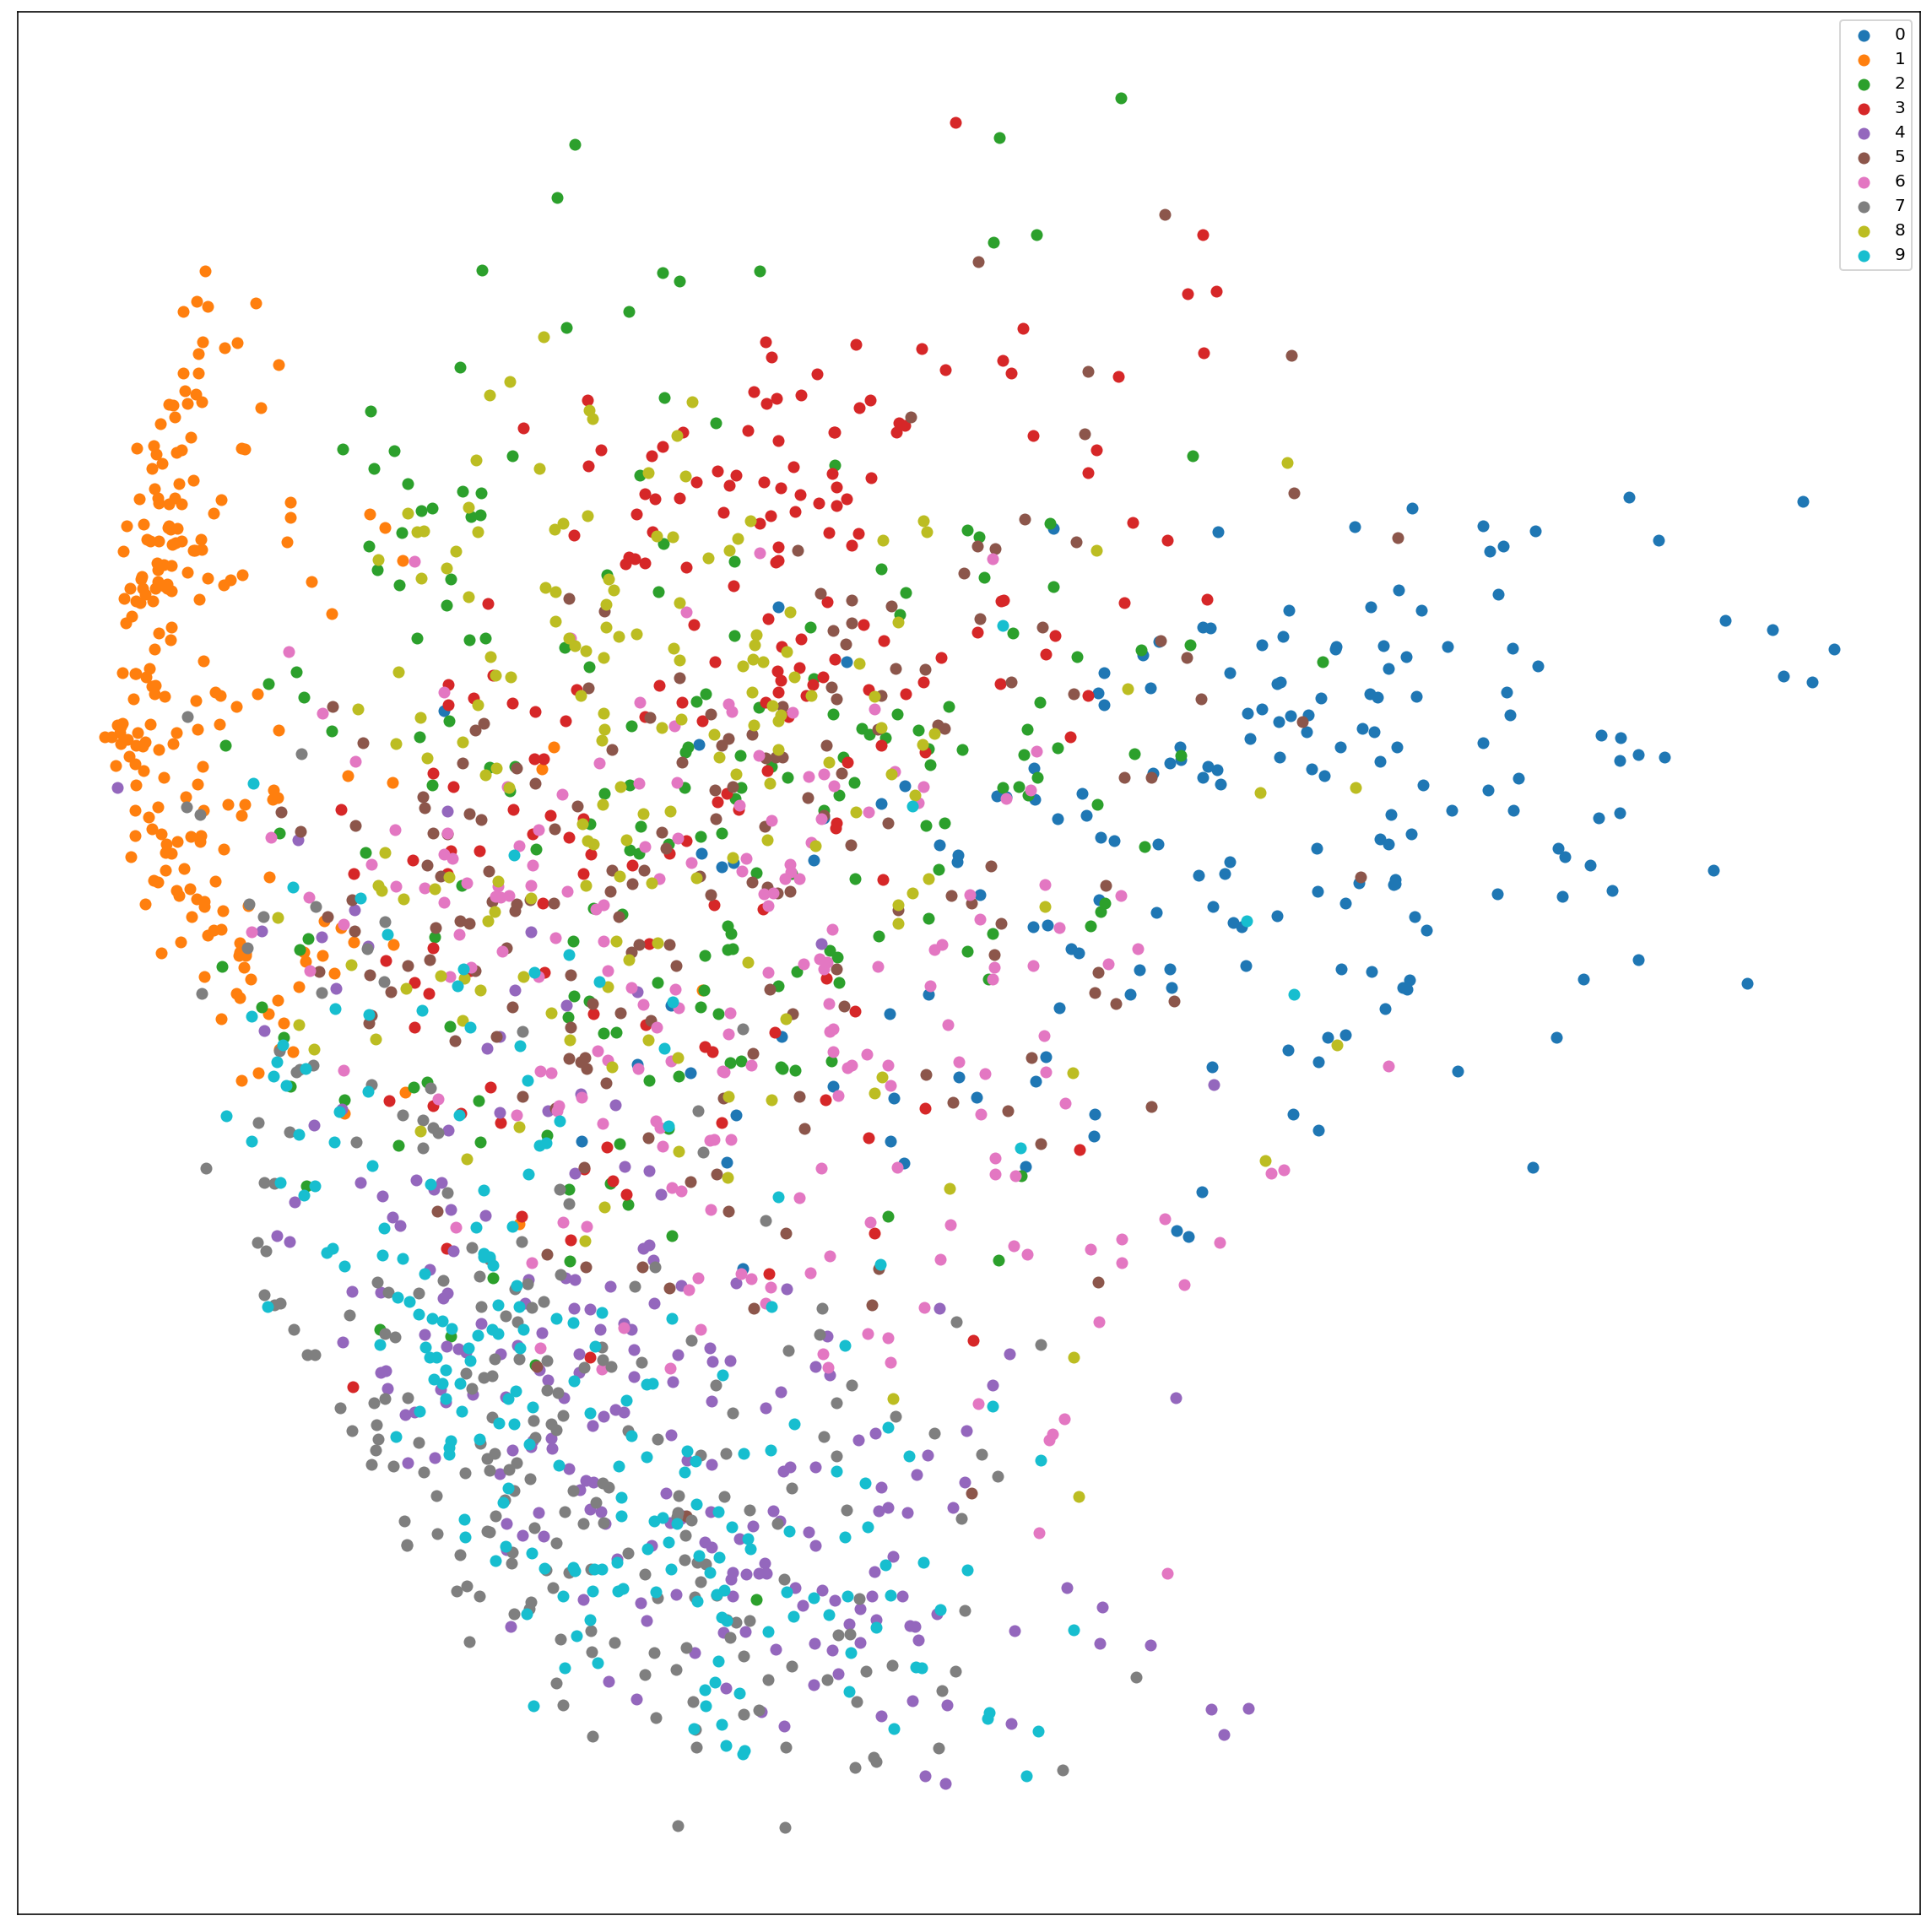

In [14]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

### T-distributed Stochastic Neighbour Embedding (T-SNE)

Make sure to have a look on this increadible [article on T-SNE](https://distill.pub/2016/misread-tsne/).

Use `T-SNE` function to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`. <BR>
Use:
 * `n_iter=500` argument to limit the number of T-SNE iterations, 
 * `verbose=2` argument to see a verbose output during embedding.

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=2)
X_tsne_embedded = tsne.fit_transform(X_small, y_small)

# raise Exception("Not implemented!")

/Users/pwojtyczek/.conda/envs/neural-networks-deep-learning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pwojtyczek/.conda/envs/neural-networks-deep-learning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.118s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528207
[t-SNE] Computed conditional probabilities in 0.050s
[t-SNE] Iteration 50: error = 78.0262909, gradient norm = 0.0035785 (50 iterations in 0.317s)
[t-SNE] Iteration 100: error = 75.8604889, gradient norm = 0.0194547 (50 iterations in 0.247s)
[t-SNE] Iteration 150: error = 75.6825256, gradient norm = 0.0009932 (50 iterations in 0.227s)
[t-SNE] Iteration 200: error = 75.6744385, gradient norm = 0.0015494 (50 iterations in 0.259s)
[t-SNE] Iteration 250: error = 75.6566391, gradient norm = 0.0134483 (50 iterations in 0.242s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.656639
[t-SNE] Iteration 300: error = 1.4846474, gradient norm = 0.0010183 (50 iterations in 0.208s)

In [16]:
X_tsne_embedded.shape

(2000, 2)

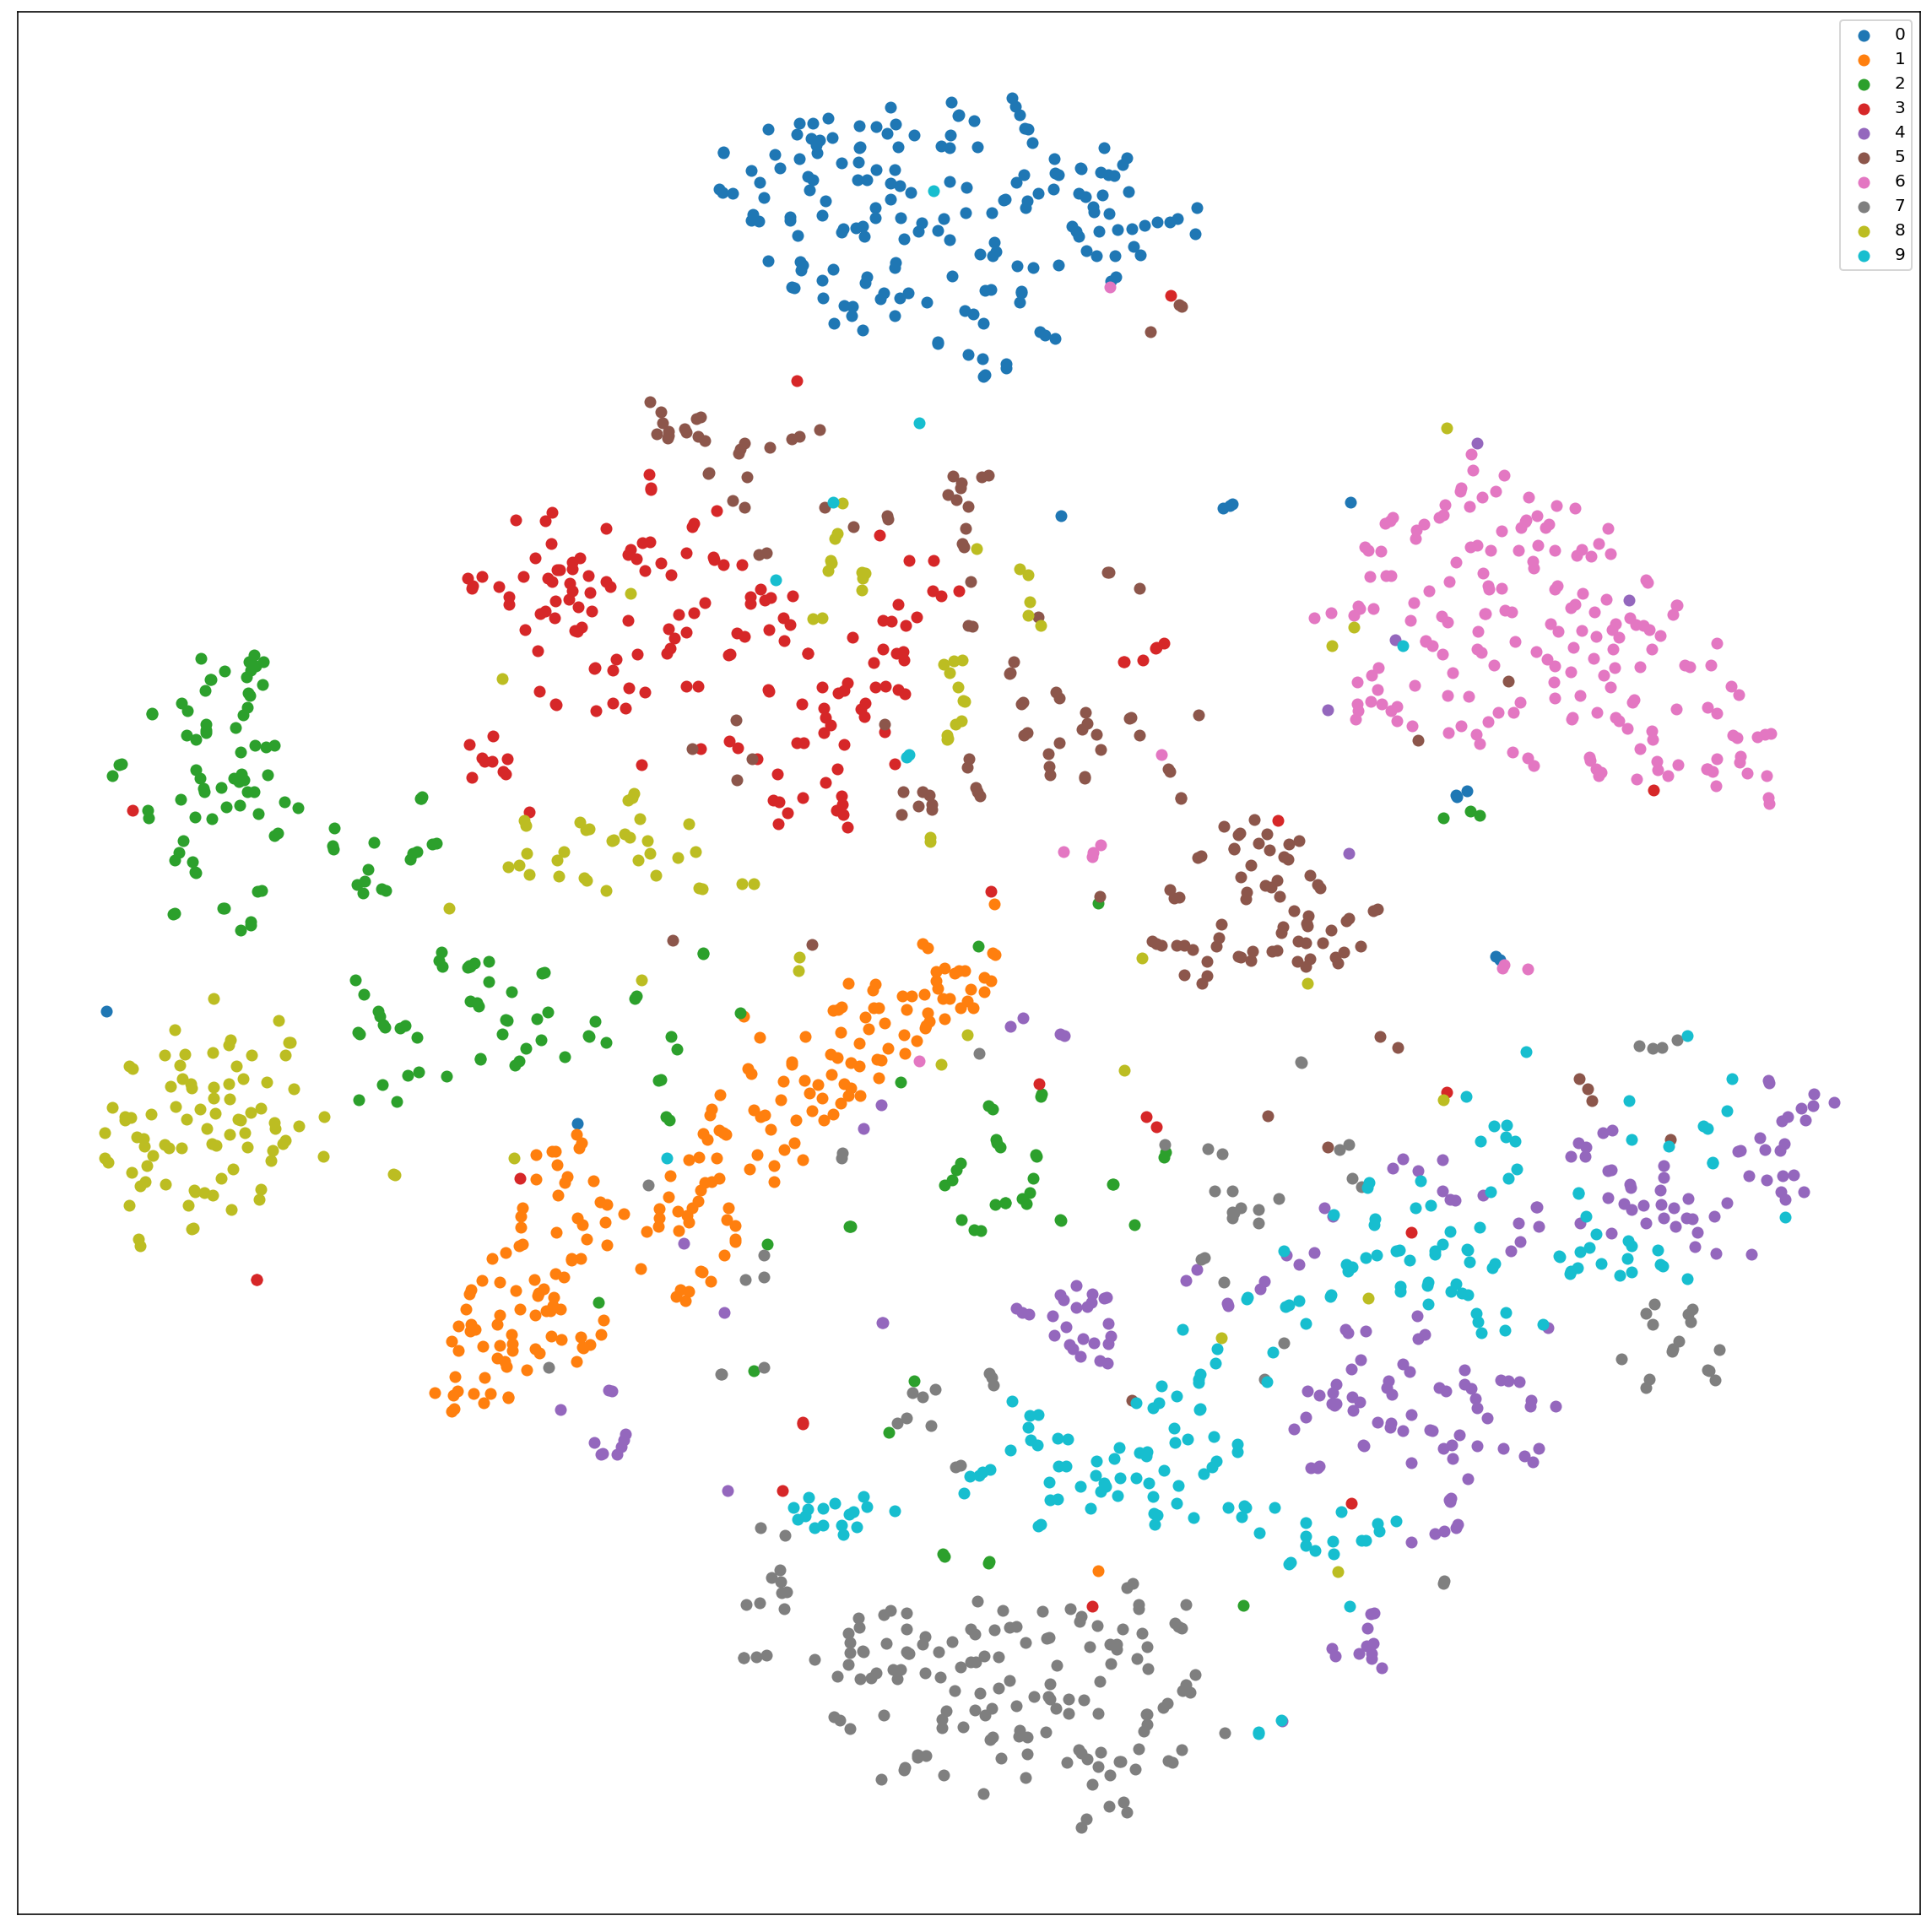

In [17]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### 3D interactive plots with plotly

In [32]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

def plot_3d_mnist_plotly_scatter(X, y):
    def make_trace(i):
        digit_indeces = y == i
        return go.Scatter3d(
            x=X[digit_indeces, 0],
            y=X[digit_indeces, 1],
            z=X[digit_indeces, 2],
            mode='markers',
            name=str(i),
            marker=dict(
                color=i,
                colorscale='Jet',
                size=4,
                symbol='circle',
                line=dict(
                    color='rgb(204, 204, 204)',
                    width=1
                )
            )
        )

    traces = [make_trace(i) for i in range(10)]

    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

Use PCA function to embed `X_small` in **three** dimensions. Store the result in `X_3d_pca_embedded`.

In [23]:
pca_3d = PCA(n_components=3)
X_3d_pca_embedded = pca_3d.fit_transform(X_small, y_small)

# raise Exception("Not implemented!")

In [24]:
X_3d_pca_embedded.shape

(2000, 3)

In [33]:
plot_3d_mnist_plotly_scatter(X_3d_pca_embedded, y_small)

## Classification task

In [34]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [35]:
from sklearn import svm
classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.001)

In [37]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, gamma=0.001):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       203
           1       0.90      0.97      0.93       234
           2       0.89      0.92      0.91       183
           3       0.91      0.92      0.92       209
           4       0.92      0.96      0.94       209
           5       0.87      0.88      0.88       170
           6       0.96      0.95      0.95       204
           7       0.96      0.88      0.92       190
           8       0.95      0.84      0.90       193
           9       0.93      0.90      0.92       205

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000




Calculate and display the confision matrix for `predicted` and `y_test` (use metrics package).

In [39]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# raise Exception("Not implemented!")

print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[200   0   0   1   0   1   1   0   0   0]
 [  0 226   2   0   0   4   0   0   2   0]
 [  3   5 168   0   1   2   2   0   2   0]
 [  0   1   2 193   0   7   1   2   1   2]
 [  0   3   1   0 200   0   0   0   1   4]
 [  2   2   1  10   3 150   1   0   1   0]
 [  1   0   4   1   3   2 193   0   0   0]
 [  0   6   3   0   5   0   0 168   1   7]
 [  3   8   5   2   2   6   3   0 163   1]
 [  4   1   2   4   4   0   0   5   0 185]]
